# Loading Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [56]:
from sklearn.preprocessing import StandardScaler

In [63]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [97]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge,RidgeCV,LassoCV, ElasticNet,ElasticNetCV

In [74]:
import tensorflow as tf
import keras as ks
from tensorflow.keras import layers

In [60]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Load Data into DataFrame and data profilation

In [3]:
df = pd.read_csv("bank.csv",sep=";",encoding="utf-8")

In [4]:
df.shape

(41188, 21)

In [5]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [14]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,10,1,2,0,0,0,0,5,1,...,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,1,5,-1,0,0,0,5,1,...,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,1,5,0,1,0,0,5,1,...,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,1,3,0,0,0,0,5,1,...,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,1,5,0,0,1,0,5,1,...,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
df.info()

In [65]:
df.isna().sum()

age              0
job              0
marital          0
education        0
default          0
housing          0
loan             0
contact          0
month            0
day_of_week      0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
emp.var.rate     0
cons.conf.idx    0
y                0
dtype: int64

Train -- No. of outliers for age: 322 	Limits: 9.5 , 69.5
Train -- No. of outliers for job: 1349 	Limits: -2.5 , 9.5
Train -- No. of outliers for marital: 61 	Limits: -0.5 , 3.5
Train -- No. of outliers for education: 1187 	Limits: -0.5 , 11.5
Train -- No. of outliers for default: 6039 	Limits: 0.0 , 0.0
Train -- No. of outliers for housing: 0 	Limits: -1.5 , 2.5
Train -- No. of outliers for loan: 5041 	Limits: 0.0 , 0.0
Train -- No. of outliers for contact: 0 	Limits: -1.5 , 2.5
Train -- No. of outliers for month: 0 	Limits: 0.5 , 12.5
Train -- No. of outliers for day_of_week: 0 	Limits: -1.0 , 7.0
Train -- No. of outliers for duration: 2068 	Limits: -222.0 , 642.0
Train -- No. of outliers for campaign: 1668 	Limits: -2.0 , 6.0
Train -- No. of outliers for pdays: 1033 	Limits: 0.0 , 0.0
Train -- No. of outliers for previous: 3906 	Limits: 0.0 , 0.0
Train -- No. of outliers for poutcome: 3906 	Limits: -1.0 , -1.0
Train -- No. of outliers for emp.var.rate: 0 	Limits: -6.6 , 6.2
Train --

In [ ]:
#Show Uniq value
for column in df.columns:
    print(f"Unique values in {column} column:")
    hi=df[column].value_counts()
    print(hi)
    print()

In [7]:
df_Un_number=df.select_dtypes(exclude=['number']).columns
df.select_dtypes(exclude=['number'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [10]:
df.select_dtypes(include=['number'])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,0,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,0,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,0,0,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
#draw
add_column=df[['y']]
test_df=df.select_dtypes(include=np.number)
test_df=test_df.join(add_column)
sns.pairplot(test_df,hue='y')

In [ ]:
# Define the number of rows and columns for subplots

numeric_columns = df.select_dtypes(include=['number'])   

num_rows = len(numeric_columns) // 2 + len(numeric_columns) % 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle('Distinct Values for Non-Numeric Columns')
#non_numeric_columns = df.select_dtypes(exclude=['number']).columns
#Distinct value for non_numeric_columns
for column in numeric_columns:
    distinct_values = df[column].unique()
    print(f"\nColumn {column}:")
    print(distinct_values)
    plt.hist(distinct_values, bins=30, density=True, alpha=0.6, color='g')

In [9]:
df['pdays']=df['pdays'].replace(999,0)

# Change Labling for none numeric data

In [ ]:
#Check Distinct value for non_numeric_columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
for column in non_numeric_columns:
    distinct_values = df[column].unique()
    print(f"\n Column Name: {column}:")
    print(distinct_values)

In [ ]:
# Define the number of rows and columns for subplots
num_rows = len(non_numeric_columns) // 2 + len(non_numeric_columns) % 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle('Distinct Values for Non-Numeric Columns')

# Flatten axes for iteration
axes = axes.flatten()

for i, column in enumerate(non_numeric_columns):
    distinct_values = df[column].value_counts()

    # Plot bar graph on the corresponding subplot
    axes[i].bar(distinct_values.index, distinct_values.values, color='orange')
    axes[i].set_title(f'Distinct Values for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Hide empty subplots
for i in range(len(non_numeric_columns), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [11]:
job_mapping={'housemaid':10, 'services':1, 'admin.':2, 'blue-collar':3, 'technician':4, 'retired':5,
 'management':6, 'unemployed':7, 'self-employed':8 ,'unknown':-1 ,'entrepreneur':9,
 'student':11}
df['job'] = df['job'].map(lambda x: job_mapping.get(x, 0))
marital_mapping = {'married': 1, 'single': 2, 'divorced': 3, 'unknown': -1} 
df['marital'] = df['marital'].map(lambda x: marital_mapping.get(x, 0))
education_mapping={'basic.4y':2, 'high.school':5, 'basic.6y':3, 'basic.9y':4, 'professional.course':6,
 'unknown':-1, 'university.degree':7, 'illiterate':1}
df['education'] = df['education'].map(lambda x: education_mapping.get(x, 0))
month_mapping={'may':5 ,'jun':6, 'jul':7, 'aug':8, 'oct':10 ,'nov':11 ,'dec':12, 'mar':3, 'apr':4, 'sep':9}    
df['month'] = df['month'].map(lambda x: month_mapping.get(x, 0))
day_of_week_mapping={'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}    
df['day_of_week'] = df['day_of_week'].map(lambda x: day_of_week_mapping.get(x, 0))

In [12]:
df['default'] = df['default'].apply(lambda value: 1 if value == 'yes' else (0 if value == 'no' else -1))
df['housing'] = df['housing'].apply(lambda value: 1 if value == 'yes' else (0 if value == 'no' else -1))
df['loan'] = df['loan'].apply(lambda value: 1 if value == 'yes' else (0 if value == 'no' else -1))
df['contact'] = df['contact'].apply(lambda value: 1 if value == 'cellular' else  0)
df['poutcome'] = df['poutcome'].apply(lambda value: 1 if value == 'success' else (0 if value == 'failure' else -1))

In [13]:
df['y'] = df['y'].apply(lambda value: 1 if value == 'yes' else (0 if value == 'no' else -1))

In [ ]:
# Define the number of rows and columns for subplots
num_rows = len(non_numeric_columns) // 2 + len(non_numeric_columns) % 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle('Distinct Values for Non-Numeric Columns')

# Flatten axes for iteration
axes = axes.flatten()

for i, column in enumerate(non_numeric_columns):
    distinct_values = df[column].value_counts()

    # Plot bar graph on the corresponding subplot
    axes[i].bar(distinct_values.index, distinct_values.values, color='orange')
    axes[i].set_title(f'Distinct Values for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Hide empty subplots
for i in range(len(non_numeric_columns), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [15]:
#write to csv file

df.to_csv('First_Version.csv', index=False)

print("DataFrame is stored.")


DataFrame به فایل CSV ذخیره شد.


In [ ]:
#draw 
add_column=df[['y']]
number_df=df.select_dtypes(include=np.number)
number_df=number_df.join(add_column)
sns.pairplot(number_df,hue='y')

In [ ]:
df.corr()

In [ ]:
scalar=MinMaxScaler()
column=numeric_columns.columns
numeric_cols=scalar.fit_transform(numeric_columns)
df_numeric=pd.DataFrame(numeric_cols,columns=column)
df_numeric.head()

In [ ]:
df

In [ ]:
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.7)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#plt.figure(figsize=(10, 8)) 
#df_new = df.select_dtypes(include=['number'])
#sns.heatmap(df_new.corr(),annot=True)

In [21]:
df = pd.read_csv("first_version.csv",sep=",")

In [67]:
# Function to check for outliers and cap values of outliers
def CheckOutliers(inTrain,inTest):
    
    # Initialize blank dataframes
    outTrain = pd.DataFrame()
    outTest = pd.DataFrame()
    
    # Loop through all features
    for colName in inTrain.columns:
        
        # Compute for lower/upper limits using the training data
        quartile_75, quartile_q25 = np.percentile(inTrain.loc[:,colName],[75,25])   # 75th and 25th percentiles
        interquartile_range = quartile_75 - quartile_q25                            # Interquartile range (IQR)
        max_val = quartile_75 + ( 1.5 * interquartile_range )                       # Upper limit
        min_val = quartile_q25 - ( 1.5 * interquartile_range )                      # Lower limit
        
        # If the value is lower/greater than the min/max limits, it is an outlier
        outliers = inTrain[(inTrain[colName] < min_val) | (inTrain[colName] > max_val)]
        
        # For outliers, apply capping -- replace the value with either the lower or upper limit
        outTrain[colName] = np.where( inTrain[colName] > max_val, max_val, np.where( inTrain[colName] < min_val, min_val, inTrain[colName] ) )

        # Apply capping to the test set using the same lower/upper limit in the train set
        outTest[colName] = np.where( inTest[colName] > max_val, max_val, np.where( inTest[colName] < min_val, min_val, inTest[colName] ) )
        
        # Summary per feature
        print(f'Train -- No. of outliers for {colName}: {outliers.shape[0]} \tLimits: {round(min_val,4)} , {round(max_val,4)}')
    
    return outTrain, outTest

# df_x_train_sc = pd.DataFrame(x_train_sc,columns=x_train.columns)

# Check and handle outliers of the data. For the test set, the lower/upper limits will be the same as the training set.
x_train_no_outliers, x_test_no_outliers = CheckOutliers(x_train,x_test)
# x_train_no_outliers.head()

Train -- No. of outliers for age: 322 	Limits: 9.5 , 69.5
Train -- No. of outliers for job: 1349 	Limits: -2.5 , 9.5
Train -- No. of outliers for marital: 61 	Limits: -0.5 , 3.5
Train -- No. of outliers for education: 1187 	Limits: -0.5 , 11.5
Train -- No. of outliers for default: 6039 	Limits: 0.0 , 0.0
Train -- No. of outliers for housing: 0 	Limits: -1.5 , 2.5
Train -- No. of outliers for loan: 5041 	Limits: 0.0 , 0.0
Train -- No. of outliers for contact: 0 	Limits: -1.5 , 2.5
Train -- No. of outliers for month: 0 	Limits: 0.5 , 12.5
Train -- No. of outliers for day_of_week: 0 	Limits: -1.0 , 7.0
Train -- No. of outliers for duration: 2068 	Limits: -222.0 , 642.0
Train -- No. of outliers for campaign: 1668 	Limits: -2.0 , 6.0
Train -- No. of outliers for pdays: 1033 	Limits: 0.0 , 0.0
Train -- No. of outliers for previous: 3906 	Limits: 0.0 , 0.0
Train -- No. of outliers for poutcome: 3906 	Limits: -1.0 , -1.0
Train -- No. of outliers for emp.var.rate: 0 	Limits: -6.6 , 6.2
Train --

C:\Users\amini\AppData\Local\Temp\ipykernel_11872\2318038710.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


NameError: name 'x_train_sc' is not defined

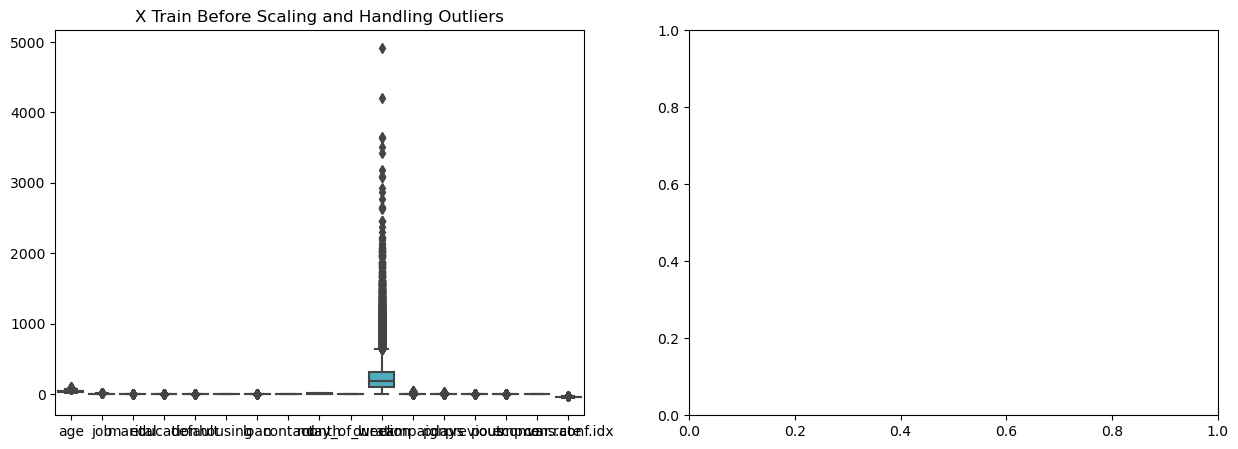

In [35]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,y
0,56,10,1,2,0,0,0,0,5,1,261,1,0,0,-1,1.1,-36.4,0
1,57,1,1,5,-1,0,0,0,5,1,149,1,0,0,-1,1.1,-36.4,0
2,37,1,1,5,0,1,0,0,5,1,226,1,0,0,-1,1.1,-36.4,0
3,40,2,1,3,0,0,0,0,5,1,151,1,0,0,-1,1.1,-36.4,0
4,56,1,1,5,0,0,1,0,5,1,307,1,0,0,-1,1.1,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,6,0,1,0,1,11,5,334,1,0,0,-1,-1.1,-50.8,1
41184,46,3,1,6,0,0,0,1,11,5,383,1,0,0,-1,-1.1,-50.8,0
41185,56,5,1,7,0,1,0,1,11,5,189,2,0,0,-1,-1.1,-50.8,0
41186,44,4,1,6,0,0,0,1,11,5,442,1,0,0,-1,-1.1,-50.8,1


In [28]:
correlation_matrix = df.corr()

#Multicollinearity
threshold = 0.8 

columns_with_high_correlation = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            columns_with_high_correlation.add(colname)

print("\nColumns with High Correlation:")
print(columns_with_high_correlation)


Columns with High Correlation:
{'poutcome', 'nr.employed', 'euribor3m'}


In [26]:
def vif_factor(independant_variable):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif=pd.DataFrame()
    vif['feature']=independant_variable.columns
    vif['vif_factor']=[variance_inflation_factor(independant_variable.values,i) for i in range(independant_variable.shape[1])]
    return vif.sort_values('vif_factor')

In [41]:
vif_factor(df)

,feature,vif_factor
6,loan,1.163820
4,default,1.419480
17,y,1.597387
12,pdays,1.623030
15,emp.var.rate,1.663399
11,campaign,1.916956
5,housing,1.951871
10,duration,2.437694
1,job,3.368908
7,contact,4.038750


In [29]:
df=df.drop(['nr.employed'],axis=1)
df=df.drop(['cons.price.idx'],axis=1)
df=df.drop(['euribor3m'],axis=1)


In [33]:
df.shape

(41188, 18)

In [30]:
vif_factor(df)

,feature,vif_factor
6,loan,1.163820
4,default,1.419480
17,y,1.597387
12,pdays,1.623030
15,emp.var.rate,1.663399
11,campaign,1.916956
5,housing,1.951871
10,duration,2.437694
1,job,3.368908
7,contact,4.038750


In [42]:
#write to csv file

# store DataFrame  CSV file
df.to_csv('Second_Version.csv', index=False)

print("DataFrame is stored.")

DataFrame به فایل CSV ذخیره شد.


In [44]:
df = pd.read_csv("Second_Version.csv",sep=",",encoding="utf-8")

In [45]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,y
0,56,10,1,2,0,0,0,0,5,1,261,1,0,0,-1,1.1,-36.4,0
1,57,1,1,5,-1,0,0,0,5,1,149,1,0,0,-1,1.1,-36.4,0
2,37,1,1,5,0,1,0,0,5,1,226,1,0,0,-1,1.1,-36.4,0
3,40,2,1,3,0,0,0,0,5,1,151,1,0,0,-1,1.1,-36.4,0
4,56,1,1,5,0,0,1,0,5,1,307,1,0,0,-1,1.1,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,6,0,1,0,1,11,5,334,1,0,0,-1,-1.1,-50.8,1
41184,46,3,1,6,0,0,0,1,11,5,383,1,0,0,-1,-1.1,-50.8,0
41185,56,5,1,7,0,1,0,1,11,5,189,2,0,0,-1,-1.1,-50.8,0
41186,44,4,1,6,0,0,0,1,11,5,442,1,0,0,-1,-1.1,-50.8,1


In [ ]:
#Modeling


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            41188 non-null  int64  
 1   job            41188 non-null  int64  
 2   marital        41188 non-null  int64  
 3   education      41188 non-null  int64  
 4   default        41188 non-null  int64  
 5   housing        41188 non-null  int64  
 6   loan           41188 non-null  int64  
 7   contact        41188 non-null  int64  
 8   month          41188 non-null  int64  
 9   day_of_week    41188 non-null  int64  
 10  duration       41188 non-null  int64  
 11  campaign       41188 non-null  int64  
 12  pdays          41188 non-null  int64  
 13  previous       41188 non-null  int64  
 14  poutcome       41188 non-null  int64  
 15  emp.var.rate   41188 non-null  float64
 16  cons.conf.idx  41188 non-null  float64
 17  y              41188 non-null  int64  
dtypes: flo

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,10,1,2,0,0,0,0,5,1,...,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,1,5,-1,0,0,0,5,1,...,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,1,5,0,1,0,0,5,1,...,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,1,3,0,0,0,0,5,1,...,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,1,5,0,0,1,0,5,1,...,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,6,0,1,0,1,11,5,...,1,0,0,-1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,3,1,6,0,0,0,1,11,5,...,1,0,0,-1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,7,0,1,0,1,11,5,...,2,0,0,-1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,4,1,6,0,0,0,1,11,5,...,1,0,0,-1,-1.1,94.767,-50.8,1.028,4963.6,1


In [47]:
df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.815577,1.500923,4.902010,-0.208653,0.499806,0.127659,0.634748,6.607896,2.979581,258.285010,2.567593,0.221229,0.172963,-0.830096,0.081886,-40.502600,0.112654
std,10.42125,2.494197,0.696860,2.025168,0.406530,0.545967,0.399297,0.481507,2.040998,1.411514,259.279249,2.770014,1.348874,0.494901,0.455754,1.570960,4.628198,0.316173
min,17.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,-3.400000,-50.800000,0.000000
25%,32.00000,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,102.000000,1.000000,0.000000,0.000000,-1.000000,-1.800000,-42.700000,0.000000
50%,38.00000,3.000000,1.000000,5.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,180.000000,2.000000,0.000000,0.000000,-1.000000,1.100000,-41.800000,0.000000
75%,47.00000,5.000000,2.000000,7.000000,0.000000,1.000000,0.000000,1.000000,8.000000,4.000000,319.000000,3.000000,0.000000,0.000000,-1.000000,1.400000,-36.400000,0.000000
max,98.00000,11.000000,3.000000,7.000000,1.000000,1.000000,1.000000,1.000000,12.000000,5.000000,4918.000000,56.000000,27.000000,7.000000,1.000000,1.400000,-26.900000,1.000000


In [49]:
X=df.drop('y',axis=1)
y=df['y']

In [51]:
X.shape, y.shape

((41188, 17), (41188,))

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=43)

In [54]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((28831, 17), (12357, 17), (28831,), (12357,))

In [58]:
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

C:\Users\amini\AppData\Local\Temp\ipykernel_11872\286358337.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X Train After Scaling and Handling Outliers')

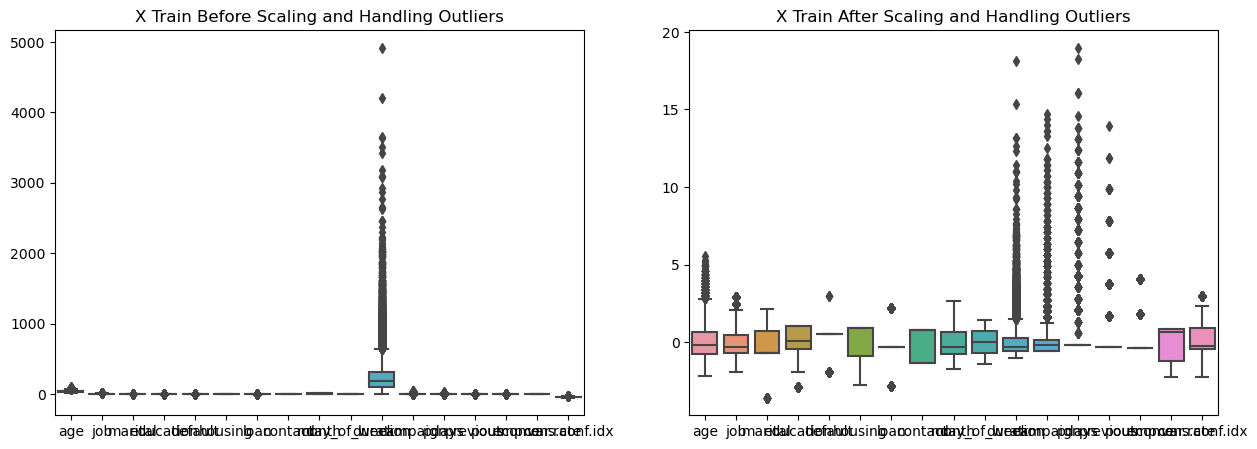

In [70]:
# Display the boxplot to compare before/after scaling
plt.subplots(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('X Train Before Scaling and Handling Outliers')

plt.subplot(1,2,2)
sns.boxplot(data=pd.DataFrame(X_train_sc,columns=X_train.columns))
# sns.boxplot(data=x_train_sc)
plt.title('X Train After Scaling and Handling Outliers')

#Regression

In [64]:
linreg=LinearRegression()
linreg.fit(X_train_sc,y_train)
y_pred=linreg.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.16202705715643673
R2 Score 0.3088122883137725


In [87]:
def ModelEval(inAlgo=None,inActual=None,inPred=None,inFeature=None):
    
    # Cost Function
    print(f'{inAlgo} - Cost Function')
    print(f'MAE: {mean_absolute_error(inActual,inPred)}')
    print(f'MSE: {mean_squared_error(inActual,inPred)}')

    # Performance of the Model
    print(f'\n{inAlgo} - Performance')
    print(f'R2: {r2_score(inActual,inPred)}')
    print(f'Adjusted R2 {1 - (1-r2_score(inActual,inPred))*(len(inActual)-1)/(len(inActual)-inFeature.shape[1]-1)}')        
# Model Training Using Linear Regression

linear_reg = LinearRegression()

# Train the model using training data
model_lr = linear_reg.fit(X_train_sc, y_train)
print('Coeff:',model_lr.coef_)
print('Intercept:',model_lr.intercept_)
print()

# Predict the values of y
y_pred_lr = model_lr.predict(X_test_sc)

# Model Eval
ModelEval('Linear Regression',y_test,y_pred_lr,X_train_sc)

tp, fn, fp, tn = confusion_matrix(y_test,predict_test,labels=[1,0]).reshape(-1)

print('Outcome values testing data: \n\n')
print('True positive:',tp)
print('False positives:',fp)
print('True negative:',tn)
print('False negative:',fn)
print( sep='\n')
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,predict_test)
print('Classification report testing data: \n',matrix)
print("______________________________________________________________________")

Coeff: [ 0.00575539  0.00489443  0.00522126  0.00430008  0.00868359 -0.0014094
 -0.00202719  0.01065313  0.00129854  0.00177668  0.12230082  0.00331606
  0.04447725 -0.00761564  0.02514195 -0.07347413  0.03162386]
Intercept: 0.11220561201484512

Linear Regression - Cost Function
MAE: 0.16202705715643673
MSE: 0.06965297560921103

Linear Regression - Performance
R2: 0.3088122883137725
Adjusted R2 0.307860007650942
Outcome values testing data: 


True positive: 1405
False positives: 10916
True negative: 36
False negative: 0

Classification report testing data: 
               precision    recall  f1-score   support

           0       1.00      0.00      0.01     10952
           1       0.11      1.00      0.20      1405

    accuracy                           0.12     12357
   macro avg       0.56      0.50      0.11     12357
weighted avg       0.90      0.12      0.03     12357

______________________________________________________________________


In [109]:
ridge=Ridge()
ridge.fit(X_train_sc,y_train)
y_pred=ridge.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

TypeError: solve() got an unexpected keyword argument 'sym_pos'

In [103]:
ridgecv=RidgeCV()
ridgecv.fit(X_train_sc,y_train)
y_pred=ridgecv.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.16202122453513568
R2 Score 0.3088137067590089


In [104]:
lassocv=LassoCV()
lassocv.fit(X_train_sc,y_train)
y_pred=lassocv.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.1619934962964366
R2 Score 0.3088580229994585


In [105]:
lasso=Lasso()
lasso.fit(X_train_sc,y_train)
y_pred=lasso.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.20039062700539992
R2 Score -2.2182525933445163e-05


In [106]:
elatic=ElasticNet()
elatic.fit(X_train_sc,y_train)
y_pred=elatic.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.20039062700539992
R2 Score -2.2182525933445163e-05


In [84]:
lr=LogisticRegression(solver='lbfgs', max_iter=3000)

Test set results:
___________________________________________________________________
Confusion matrix : 



C:\Users\amini\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


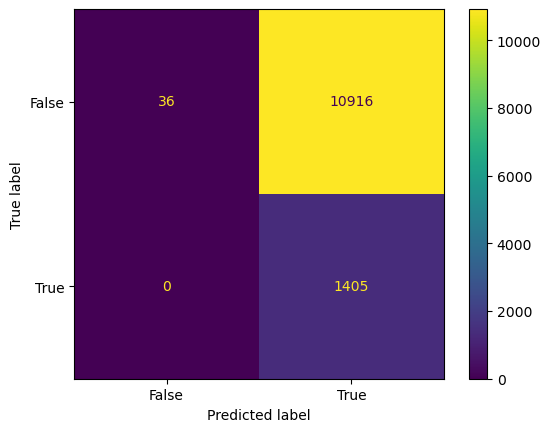


Outcome values testing data: 


True positive: 1405
False positives: 10916
True negative: 36
False negative: 0

Classification report testing data: 
               precision    recall  f1-score   support

           0       1.00      0.00      0.01     10952
           1       0.11      1.00      0.20      1405

    accuracy                           0.12     12357
   macro avg       0.56      0.50      0.11     12357
weighted avg       0.90      0.12      0.03     12357

______________________________________________________________________


In [85]:
model=lr.fit(X_train_sc,y_train)
predict_test=model.predict(x_test)
#Model Evaluation
# confusion matrix
matrix = confusion_matrix(y_test,predict_test)
print('Test set results:')
print("___________________________________________________________________")
print('Confusion matrix : \n')
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print( sep='\n')
# outcome values order in sklearn


tp, fn, fp, tn = confusion_matrix(y_test,predict_test,labels=[1,0]).reshape(-1)

print('Outcome values testing data: \n\n')
print('True positive:',tp)
print('False positives:',fp)
print('True negative:',tn)
print('False negative:',fn)
print( sep='\n')
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,predict_test)
print('Classification report testing data: \n',matrix)
print("______________________________________________________________________")

In [91]:
from sklearn.tree import  DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
from sklearn import tree
plt.figure(figsize=(15,10));
from sklearn.metrics import confusion_matrix, r2_score, classification_report
y_pred=clf.predict(X_test)
print("?",confusion_matrix(y_test,y_pred))
print("r2_SCOR",r2_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

? [[10225   727]
 [  660   745]]
r2_SCOR -0.11383214752696325
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10952
           1       0.51      0.53      0.52      1405

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



<Figure size 1500x1000 with 0 Axes>

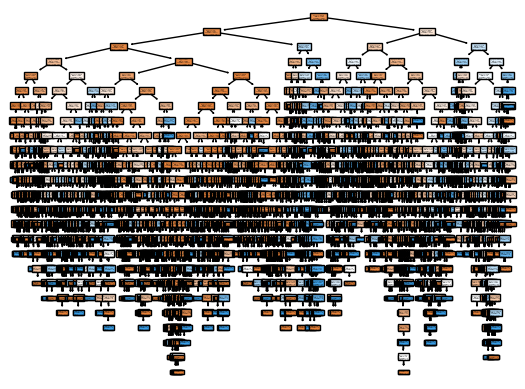

In [92]:
tree.plot_tree(clf,filled=True);

In [110]:
rf=RandomForestClassifier(n_estimators=100)
model=rf.fit(X_train_sc,y_train)
rf_test=model.predict(X_test_sc)

Test Set results: 


Confusion matrix testing data : 



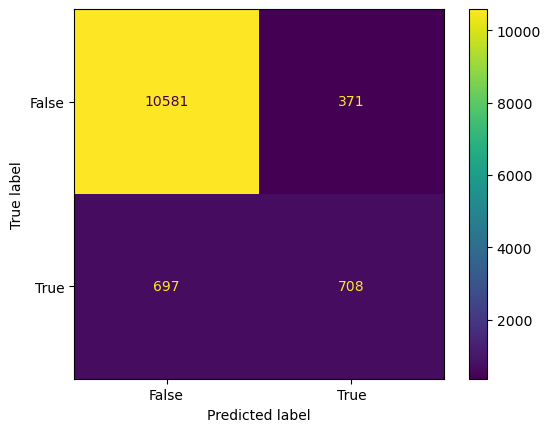

Outcome values testing data : 

True positive: 708
False positives: 371
True negative: 10581
False negative: 697

Classification report testing data: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10952
           1       0.66      0.50      0.57      1405

    accuracy                           0.91     12357
   macro avg       0.80      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357



In [111]:
rf_matrix = confusion_matrix(y_test,rf_test)
print('Test Set results: \n\n')
print('Confusion matrix testing data : \n')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,rf_test,labels=[1,0]).reshape(-1)

print('Outcome values testing data : \n')
print('True positive:',tp)
print('False positives:',fp)
print('True negative:',tn)
print('False negative:',fn)
print( sep='\n')

# classification report for precision, recall f1-score and accuracy
rf_matrix = classification_report(y_test,rf_test)
print('Classification report testing data: \n',rf_matrix)

In [ ]:
### Artificial Neural Network (ANN)
- Implement a simple ANN for regression using a framework like TensorFlow or Keras.
- Design the architecture of the neural network, including the input and output layers.
- Train the ANN on the training set.
- Make predictions on the testing set.
- Evaluate the model's performance using the same regression metrics used for Linear Regression.

X Train - ANN: (23064, 17)
Y Train - ANN: (23064,)
X Valid - ANN: (5767, 17)
Y Valid - ANN: (5767,)
Layers:

[<keras.layers.core.dense.Dense object at 0x000001E2660AA250>, <keras.layers.core.dense.Dense object at 0x000001E265DA74C0>, <keras.layers.core.dense.Dense object at 0x000001E2610FC0A0>, <keras.layers.core.dense.Dense object at 0x000001E26ACD2A00>]


Summary:

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                900       
                                                                 
 hiddenLayer1 (Dense)        (None, 30)                1530      
                                                                 
 hiddenLayer2 (Dense)        (None, 10)                310       
                                                                 
 outputLayer (Dense)         (None, 1)                 11        
             

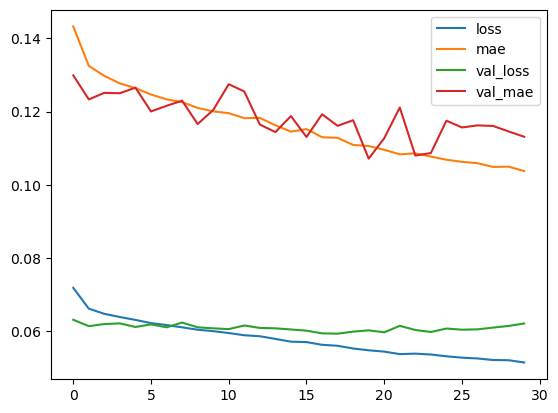

In [99]:
# Split the data intro training and validation sets
x_train_ann, x_valid_ann, y_train_ann, y_valid_ann = train_test_split(X_train_sc,y_train,test_size=0.2,random_state=1234)

print('X Train - ANN:',x_train_ann.shape)
print('Y Train - ANN:',y_train_ann.shape)
print('X Valid - ANN:',x_valid_ann.shape)
print('Y Valid - ANN:',y_valid_ann.shape)
# Set up the layers of ANN
ann_layers = [tf.keras.layers.Dense(units=50, input_shape=x_train_ann.shape[1:], activation='relu'),
              tf.keras.layers.Dense(units=30, activation="relu", kernel_initializer='uniform', name="hiddenLayer1"),
              tf.keras.layers.Dense(units=10, activation="relu", kernel_initializer='uniform', name="hiddenLayer2"),
            #   tf.keras.layers.Dense(units=10, activation="relu", kernel_initializer='uniform', name="hiddenLayer3"),
              tf.keras.layers.Dense(units=1, activation="linear", kernel_initializer='uniform', name="outputLayer")]

model_ann = tf.keras.models.Sequential(ann_layers)

print('Layers:\n')
print(model_ann.layers)
print('\n\nSummary:\n')
print(model_ann.summary())
# Compile the ANN model
model_ann.compile(loss='mse',
                  optimizer="adam",
                  metrics=['mae']
                  )

# Model Training Using ANN
history = model_ann.fit(x_train_ann, y_train_ann, epochs=30,
                        validation_data=(x_valid_ann, y_valid_ann),
                        batch_size=32)

# Plot
pd.DataFrame(history.history).plot()
# Predict the values of y
y_pred_ann = model_ann.predict(X_test_sc, verbose=0)

# Model Eval
ModelEval('ANN',y_test,y_pred_ann,X_train_sc)

X Train - ANN: (23064, 17)
Y Train - ANN: (23064,)
X Valid - ANN: (5767, 17)
Y Valid - ANN: (5767,)
Layers:

[<keras.layers.core.dense.Dense object at 0x000001E26222EAF0>, <keras.layers.core.dense.Dense object at 0x000001E26B5505E0>, <keras.layers.core.dense.Dense object at 0x000001E26AD759D0>, <keras.layers.core.dense.Dense object at 0x000001E26AD75A30>, <keras.layers.core.dense.Dense object at 0x000001E26AD751F0>]


Summary:

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 50)                900       
                                                                 
 hiddenLayer1 (Dense)        (None, 30)                1530      
                                                                 
 hiddenLayer2 (Dense)        (None, 10)                310       
                                                                 
 hiddenLayer3 (De

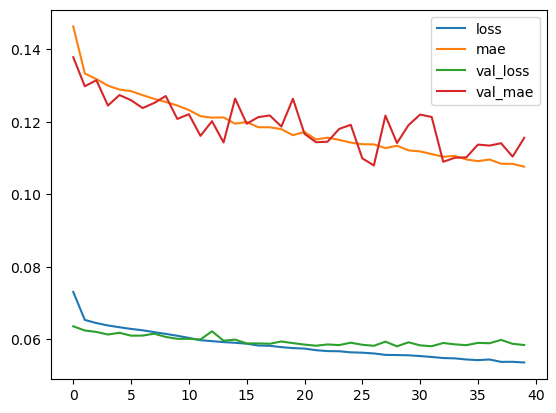

In [108]:
# Split the data intro training and validation sets
x_train_ann, x_valid_ann, y_train_ann, y_valid_ann = train_test_split(X_train_sc,y_train,test_size=0.2,random_state=1234)

print('X Train - ANN:',x_train_ann.shape)
print('Y Train - ANN:',y_train_ann.shape)
print('X Valid - ANN:',x_valid_ann.shape)
print('Y Valid - ANN:',y_valid_ann.shape)
# Set up the layers of ANN
ann_layers = [tf.keras.layers.Dense(units=50, input_shape=x_train_ann.shape[1:], activation='relu'),
              tf.keras.layers.Dense(units=30, activation="tanh", kernel_initializer='uniform', name="hiddenLayer1"),
              tf.keras.layers.Dense(units=10, activation="sigmoid", kernel_initializer='uniform', name="hiddenLayer2"),
              tf.keras.layers.Dense(units=10, activation="softsign", kernel_initializer='uniform', name="hiddenLayer3"),
              tf.keras.layers.Dense(units=1, activation="linear", kernel_initializer='uniform', name="outputLayer")]

model_ann = tf.keras.models.Sequential(ann_layers)

print('Layers:\n')
print(model_ann.layers)
print('\n\nSummary:\n')
print(model_ann.summary())
# Compile the ANN model
model_ann.compile(loss='mse',
                  optimizer="adam",
                  metrics=['mae']
                  )

# Model Training Using ANN
history = model_ann.fit(x_train_ann, y_train_ann, epochs=40,
                        validation_data=(x_valid_ann, y_valid_ann),
                        batch_size=32)

# Plot
pd.DataFrame(history.history).plot()
# Predict the values of y
y_pred_ann = model_ann.predict(X_test_sc, verbose=0)

# Model Eval
ModelEval('ANN',y_test,y_pred_ann,X_train_sc)